In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library
import tensorflow  as tf
import tensorflow_datasets as tfds
from sklearn import datasets
warnings.filterwarnings("ignore")

In [17]:
headers = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "fclass"]
df = pd.read_csv('magic04.data',names=headers)

In [18]:
mapping = {'g': 1, 'h': 0}
df["fclass"] = df["fclass"].map(mapping)

In [19]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fclass
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [20]:
df = df.sample(frac=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 11543 to 14779
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  fclass    19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.7 MB


In [22]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fclass
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [23]:
print(len(df[df['fAlpha'] == 0]))
print(len(df[df['fAlpha'] == 90]))
print(len(df[df['fSize'] == 0]))
print(len(df[df['fLength'] == 0]))
print(len(df[df['fWidth'] == 0]))


5
4
0
0
98


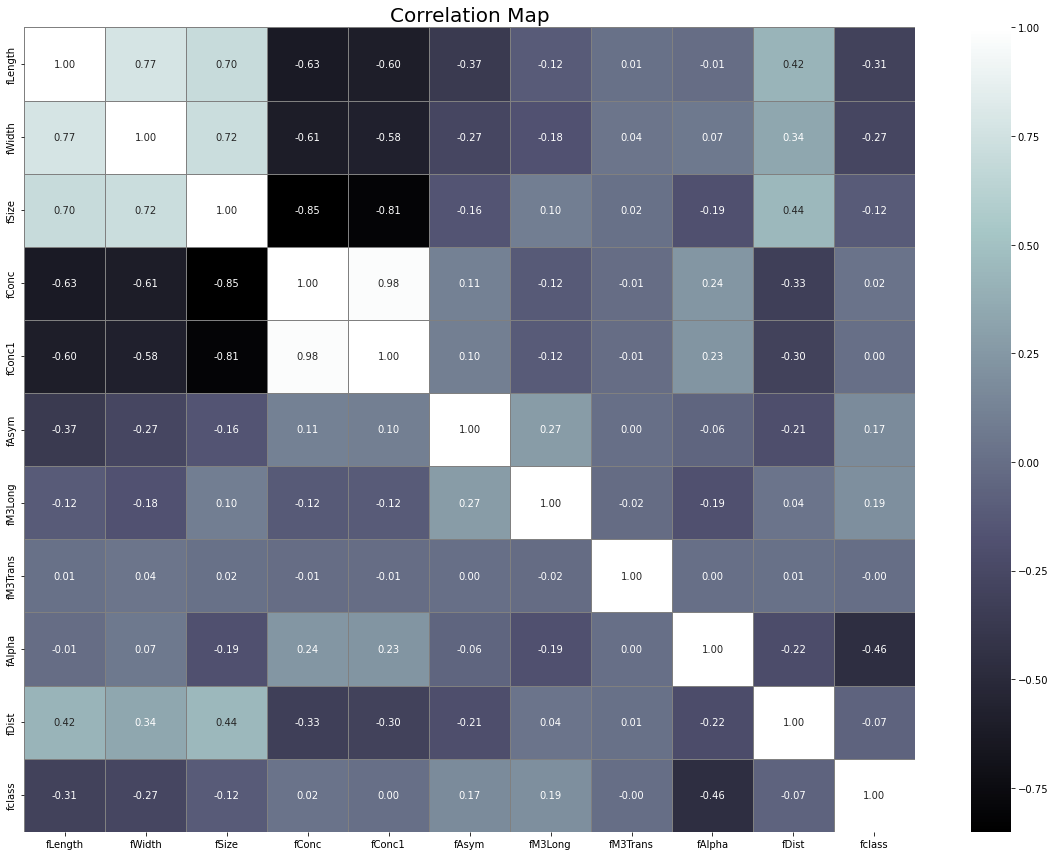

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()      # lightest and darkest cells are most correlated ones

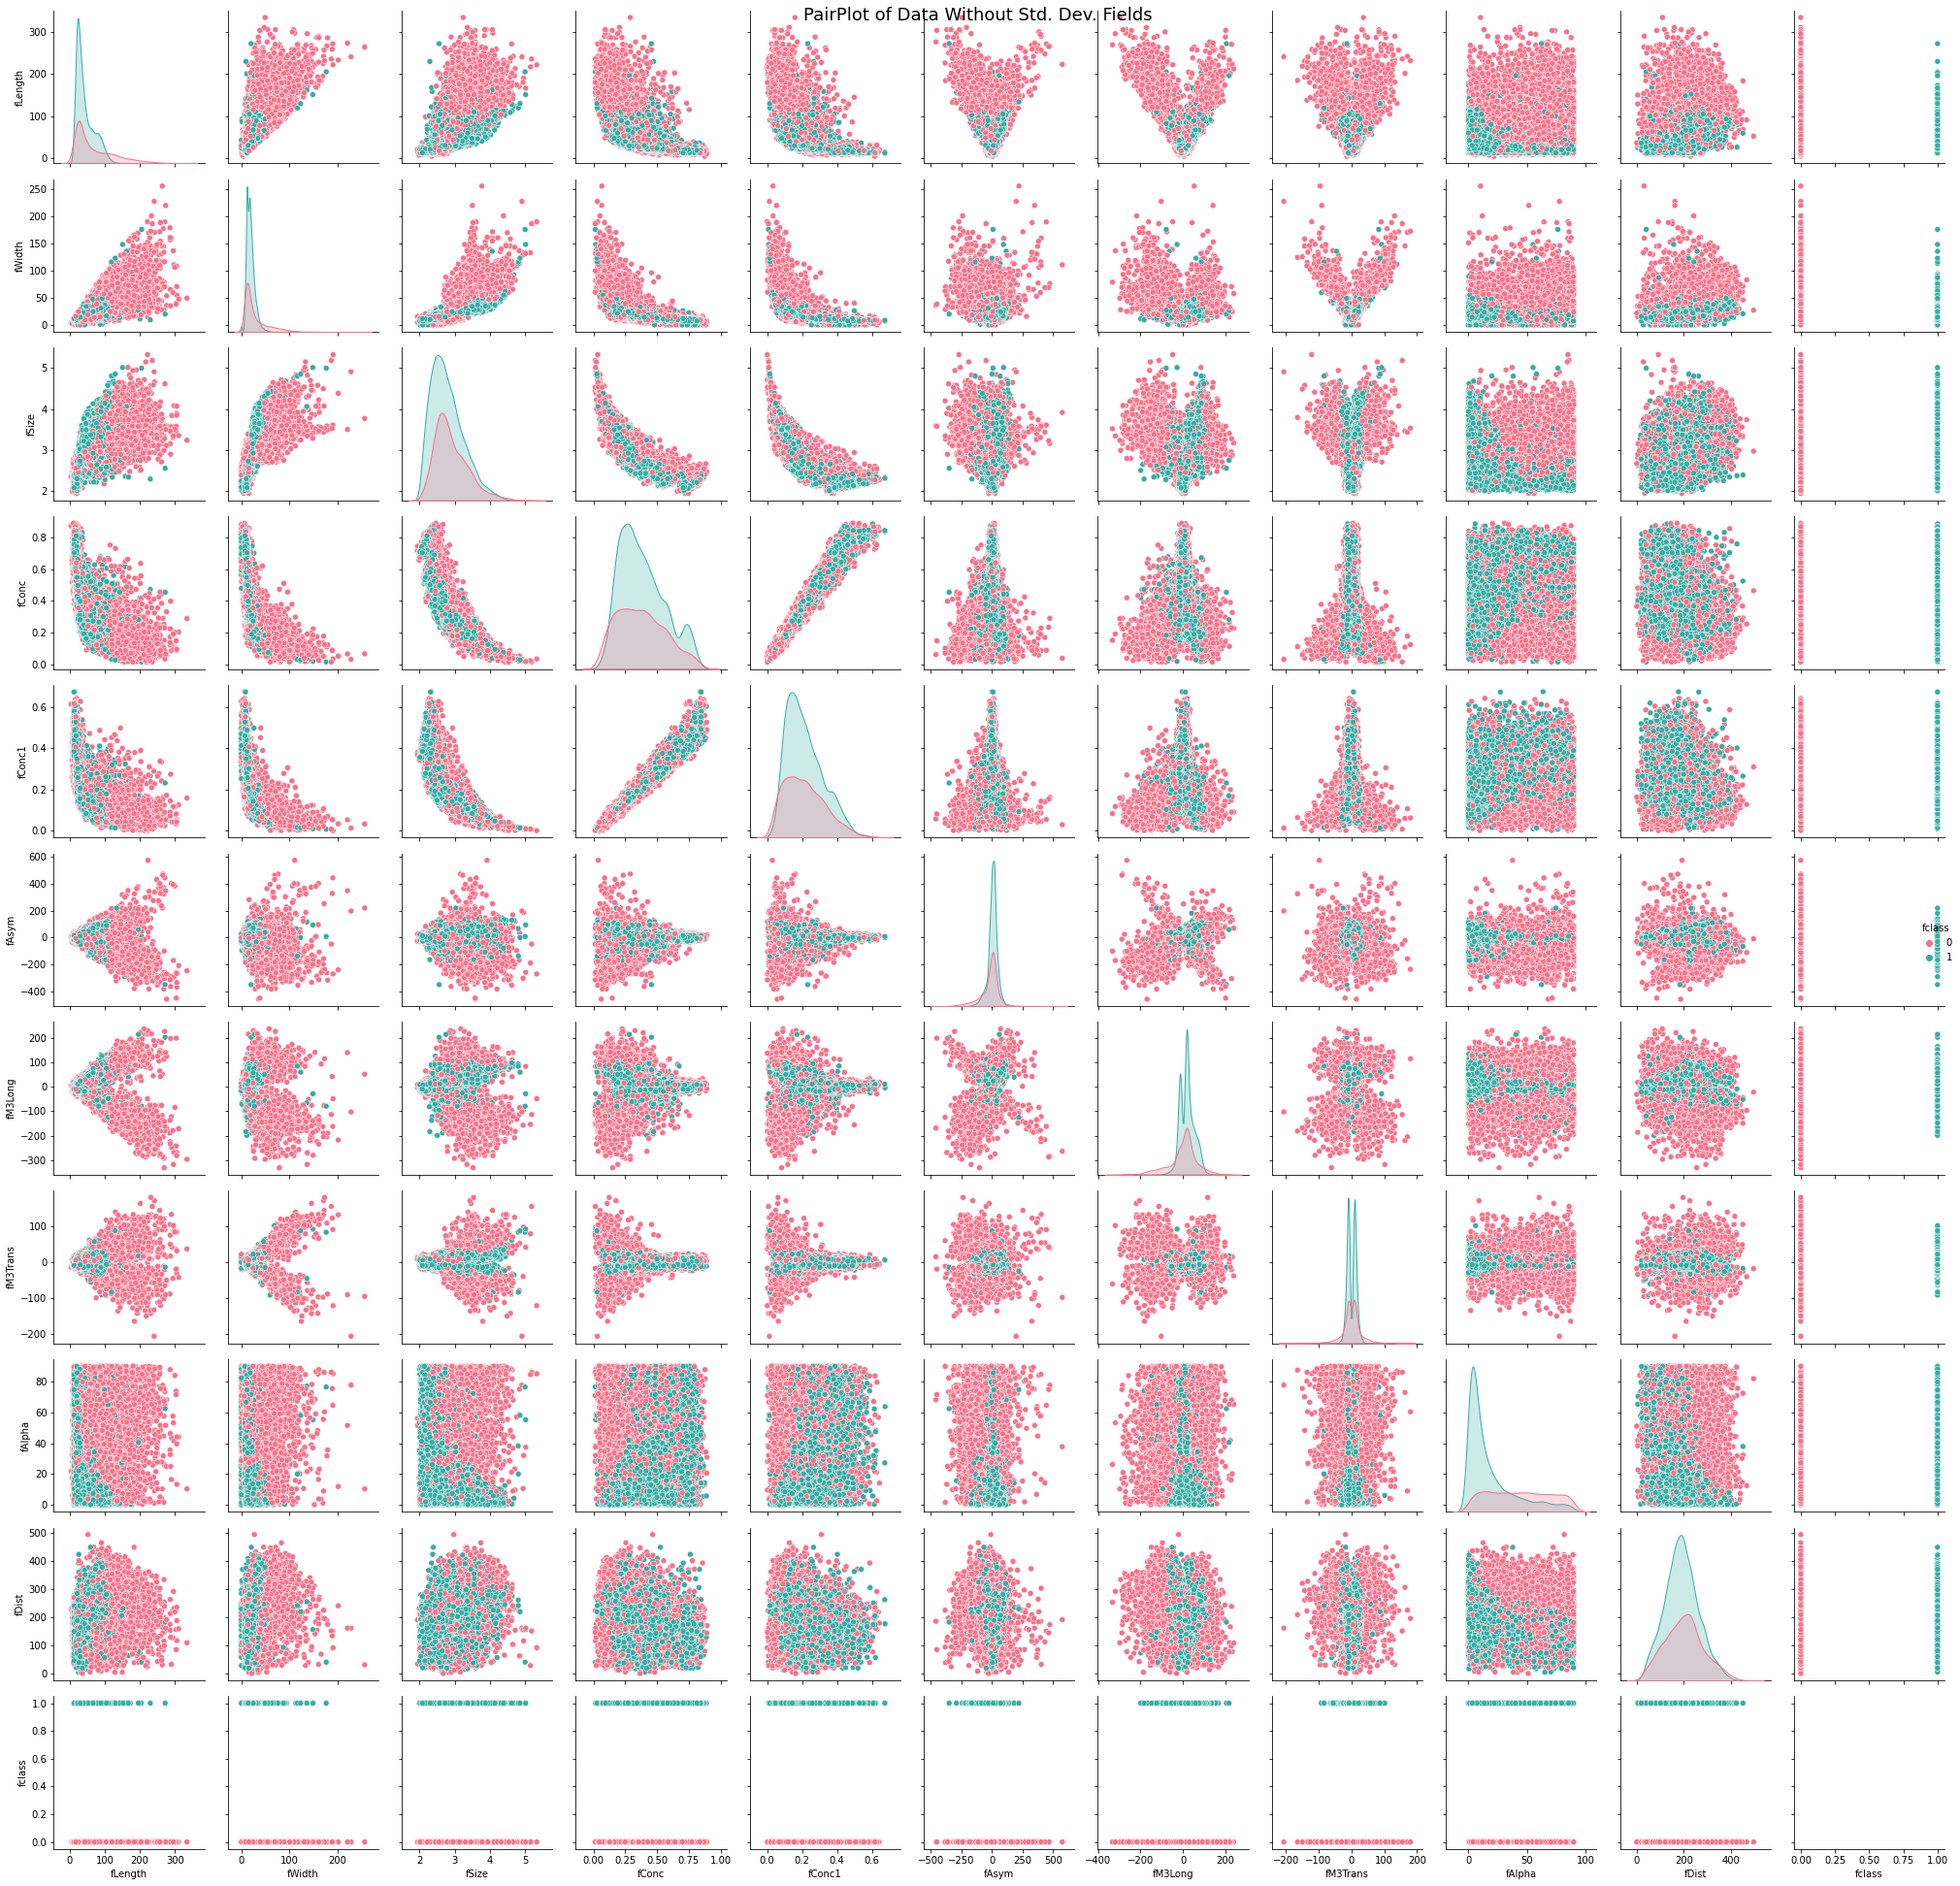

In [26]:
sns.pairplot(data=df,
             palette="husl",
             hue="fclass",
             vars=headers)

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data

In [27]:
labels = df.fclass.values
df.drop(["fclass"],axis=1,inplace=True)
features = df.values

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,test_size=0.5)

In [51]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")

lr_model.fit(x_train,y_train)

y_head_lr = lr_model.predict(x_test)

lr_score = lr_model.score(x_test,y_test)

In [52]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)

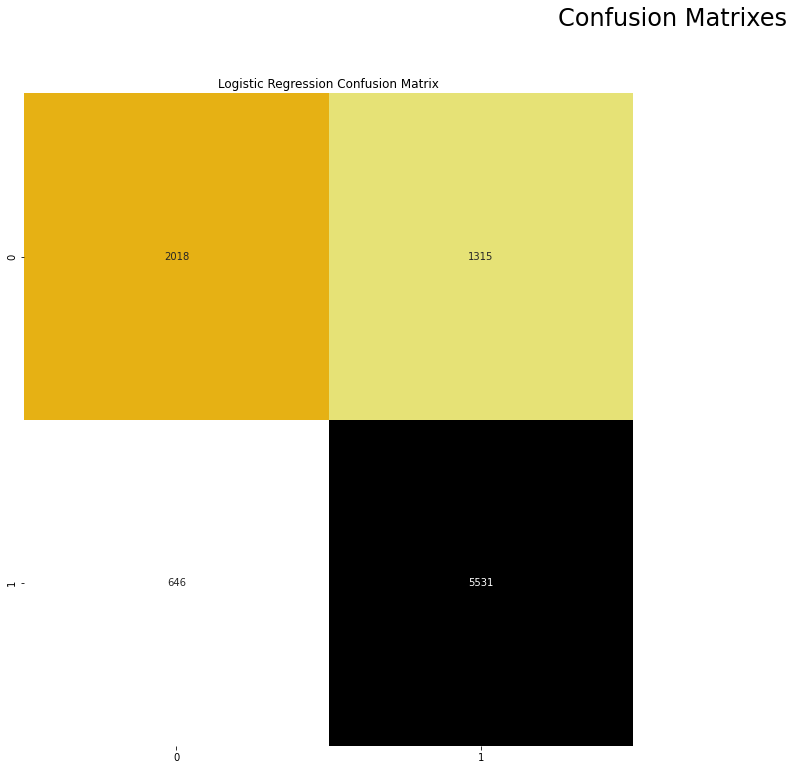

In [53]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(1,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()

In [54]:
#Compile training set S from pairs of X and Y's
S = [x_train,y_train] 

#We also build a validation sample
T = [x_test,y_test]

In [55]:
def simple_predictor(x,S):
    #The predictor takes as input the observed feature vector x
    #and the training set S = (X,Y)
    
    X,Y = S

    #the following predictor function is an implementation of eq. 2.3 in 
    #Shai Shalev-Shwartz & Shai Ben-David,2016, p. 16
    if(x in X):
       
        #find correct index in training data
        foo = np.where(np.equal(X,x).all(axis=1))
        y   = Y[foo]
        
        return y
    else:
        return 0

In [62]:
def Loss(T,S,h):
    #this implements the empirical risk function
    X_test, Y_test = T
    print('X_test: ',X_test)
    print('Y_test: ',Y_test)
    
    failures=0
    
    for i in np.arange(len(Y_test)):
        x_test = X_test[i]
        y_test = Y_test[i]
                
        #generate prediction
        y_pred=h(x_test,S)

        if (len(y_pred)>1):
            print('x_test: ',x_test)
            print('y_test: ',y_test)
            print('y_pred: ',y_pred)
       
        #count failures
        if(np.fabs(y_pred-y_test)>0.):
            failures+=1
            
    return failures/len(Y_test)

In [63]:
#Estimate the performance of the simple predictor by estimating the failure rate F
F_train=Loss(S,S,simple_predictor)

print('The predictor has a failure rate F_train =',F_train)

X_test:  [[0.0758078  0.05682185 0.21277351 ... 0.52746019 0.03584444 0.44454987]
 [0.07359618 0.05551209 0.23063276 ... 0.55657574 0.8632     0.18816946]
 [0.06878917 0.037927   0.10795387 ... 0.53802881 0.04083333 0.39664974]
 ...
 [0.07858991 0.06001318 0.12652277 ... 0.55818587 0.36563333 0.32255789]
 [0.09285754 0.04246164 0.156712   ... 0.55720362 0.12851111 0.18549142]
 [0.16856076 0.12012154 0.20884092 ... 0.60855118 0.57750889 0.3839573 ]]
Y_test:  [1 0 1 ... 1 1 0]
x_test:  [0.59657586 0.32192081 0.60730337 0.09728378 0.07823381 0.22591063
 0.2521448  0.37898258 0.81811556 0.6863205 ]
y_test:  0
y_pred:  [0 0]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()